In [11]:
pip install scienceplots


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
# Importing stuff

import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science','notebook','grid'])
import sympy as sp
import random
from IPython.display import display, Math
import pandas as pd
from scipy.special import erfc 
from IPython.core.display import Latex
from sympy import *
import iminuit
from scipy.stats import ks_2samp
from iminuit import cost
from iminuit import Minuit
from scipy.stats import chi2
from scipy.stats import binom
from scipy.stats import shapiro
from scipy.stats import norm, gamma
from sklearn.metrics import roc_curve, auc
from scipy.optimize import curve_fit
    

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

# Problem 1

### Problem 1.1.1

In [14]:
#Simulating the problem

N_exp = 100000

N_coin = 20
N_shoot = 2500
p_hit = 0.004

#Doing it for both at the same time
N1_array = np.zeros(N_exp)
N2_array = np.zeros(N_exp)

for i in range(N_exp):
    N1_array[i] = np.sum(np.random.randint(0, 2, N_coin) == 0)

    N2_array[i] = np.sum(np.random.random(N_shoot) <= p_hit)

P_N1_greater_than_N2 = np.mean(N1_array > N2_array)
P_N1_greater_than_N2_err = np.std(N1_array > N2_array, ddof = 1) / np.sqrt(N_exp)

P_N2_greater_than_N1 = np.mean(N2_array > N1_array)
P_N2_greater_than_N1_err = np.std(N2_array > N1_array, ddof = 1) / np.sqrt(N_exp)

print(f'P(N1>N2) = {P_N1_greater_than_N2:.3f} +- {P_N1_greater_than_N2_err:.3f}')
print(f'P(N2>N1) = {P_N2_greater_than_N1:.3f} +- {P_N2_greater_than_N1_err:.3f}')

P(N1>N2) = 0.457 +- 0.002
P(N2>N1) = 0.438 +- 0.002


### Problem 1.1.2

In [15]:
# Data and theory calculations 
P_25_250_N2     = np.mean((N2_array >= 25) & (N2_array <= 250))
P_25_250_N2_err = np.std((N2_array >= 25) & (N2_array <= 250), ddof = 1) / np.sqrt(N_exp)

print(f'P(25<= N2 <= 250) = {P_25_250_N2} +- {P_25_250_N2_err}')
print(f'P(25<= N2 <= 250) Theory =', binom.cdf(250, N_shoot, p_hit) - binom.cdf(24, N_shoot, p_hit))

P(25<= N2 <= 250) = 2e-05 +- 1.4142064912168937e-05
P(25<= N2 <= 250) Theory = 4.493315896603178e-05


### Problem 1.1.3

In [16]:
# Again data and theory calculations

P_10_N1     = np.mean((N1_array == 10))
P_10_N1_err = np.std((N1_array == 10), ddof = 1) / np.sqrt(N_exp)

P_10_N2     = np.mean((N2_array == 10))
P_10_N2_err = np.std((N2_array == 10), ddof = 1) / np.sqrt(N_exp)

P_20_N1     = np.mean((N1_array == 20))
P_20_N1_err = np.std((N1_array == 20), ddof = 1) / np.sqrt(N_exp)

P_20_N2     = np.mean((N2_array == 20))
P_20_N2_err = np.std((N2_array == 20), ddof = 1) / np.sqrt(N_exp)

print(f'P(N1 = 10) = {P_10_N1} +- {P_10_N1_err}')
print(f'P(N1 = 10) Theory =', binom.pmf(10, N_coin, 0.5))

print(f'P(N2 = 10) = {P_10_N2} +- {P_10_N2_err}')
print(f'P(N2 = 10) Theory =', binom.pmf(10, N_shoot, p_hit))

print(f'P(N1 = 20) = {P_20_N1} +- {P_20_N1_err}')
print(f'P(N1 = 20) Theory =', binom.pmf(20, N_coin, 0.5))

print(f'P(N2 = 20) = {P_20_N2} +- {P_20_N2_err}')
print(f'P(N2 = 20) Theory =', binom.pmf(20, N_shoot, p_hit))

P(N1 = 10) = 0.17604 +- 0.0012043727367957527
P(N1 = 10) Theory = 0.1761970520019531
P(N2 = 10) = 0.12581 +- 0.0010487275324384177
P(N2 = 10) Theory = 0.12536099218185245
P(N1 = 20) = 0.0 +- 0.0
P(N1 = 20) Theory = 9.5367431640625e-07
P(N2 = 20) = 0.00197 +- 0.0001402190700792019
P(N2 = 20) Theory = 0.0018362936848229186


# Problem 2

### Problem 2.1.1

In [17]:
# Using sympy

mu_x, mu_y      = 1.71, 10.1
sig_x, sig_y    = 0.05, 0.3

z, x, y = symbols("z, x, y")
dz, dx, dy = symbols("dz, sigma_x, sigma_y")

z = sp.cos(x**2) / sp.ln(x*y)
lprint(latex(Eq(symbols('z'), z)))

dz = sqrt((z.diff(x)*dx)**2 + (z.diff(y)*dy)**2)
lprint(latex(Eq(symbols('sigma_z'), dz)))

fz = lambdify((x,y), z)
fdz = lambdify((x, dx, y, dy), dz)

vz = fz(mu_x, mu_y)
vdz = fdz(mu_x, sig_x, mu_y, sig_y)
lprint(fr'z = {vz:.6f} \pm {vdz:.6f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.1.2

In [18]:
#Again using sympy

rho = symbols("rho_xy")

dz_corr = sqrt((z.diff(x)*dx)**2 + (z.diff(y)*dy)**2 + 2*rho*z.diff(x)*z.diff(y)*dx*dy)

lprint(latex(Eq(symbols('sigma_z'), dz_corr)))

fdz_corr = lambdify((x, dx, y, dy, rho), dz_corr)

vdz_corr = fdz_corr(mu_x, sig_x, mu_y, sig_y, 0.87)
lprint(fr'z = {vz:.3f} \pm {vdz_corr:.3f}')


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.2.1

In [19]:
#Importing data
df = pd.read_csv('data_WaterDensity.csv', header=0)
temp, density = df.values.T
df
temp

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9,
       3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 5.9, 5.9, 5.9, 5.9, 5.9,
       5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9,
       5.9, 5.9, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8,
       7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8])

In [20]:
#Defining densities at the different temperatures
density1 = density[:20]
density2 = density[20:40]
density3 = density[40:60]
density4 = density[60:80]
density5 = density[80:100]

densities = [density1, density2, density3, density4, density5]

#Calculating mean and errors on densities at the different temperatures
for i, dens in enumerate(densities, start = 1):
    mean    = np.mean(dens)
    err     = np.std(dens, ddof = 1) / np.sqrt(len(dens))
    print(f"Temperature {i}: {mean:.6f} +- {err:.6f}")

Temperature 1: 0.999855 +- 0.000003
Temperature 2: 0.999952 +- 0.000003
Temperature 3: 0.999972 +- 0.000003
Temperature 4: 0.999951 +- 0.000004
Temperature 5: 0.999865 +- 0.000004


### Problem 2.2.2

In [21]:
#Importing erfc as it didn't work when I had it in the beginning for some reason
from scipy.special import erfc

#First defining chauvenet criteorion function
def chauvenet(y):
    mean = np.mean(y)
    std  = np.std(y, ddof = 1)
    N = len(y)
    criterion = 1/(2*N)

    d = np.abs(y - mean) / std
    d /= np.sqrt(2)
    prob = erfc(d)

    return prob >= criterion

#Using chauvenet on each temperature densities until no more is removed
for i, dens in enumerate(densities, start=1):
    y = dens.copy()
    excluded = []

    while True:
        mask = chauvenet(y)
        if mask.all():
            break
        excluded.extend(y[~mask])
        y = y[mask]

    mean = np.mean(y)
    err  = np.std(y, ddof=1) / np.sqrt(len(y))

    print(f"Temperature {i}")
    print(f"Excluded measurements:")
    for val in excluded:
        print(f"  {val:.8f}")

    print(f"Final result: {mean:.8f} ± {err:.8f}  (N={len(y)})")


Temperature 1
Excluded measurements:
  0.99989390
  0.99983280
  0.99983200
  0.99986720
  0.99984680
  0.99985080
Final result: 0.99985574 ± 0.00000037  (N=14)
Temperature 2
Excluded measurements:
  0.99991160
  0.99999600
  0.99995760
Final result: 0.99995184 ± 0.00000050  (N=17)
Temperature 3
Excluded measurements:
  0.99991820
  0.99996970
Final result: 0.99997518 ± 0.00000037  (N=18)
Temperature 4
Excluded measurements:
  1.00001430
  0.99998090
  0.99996510
  0.99992630
Final result: 0.99994621 ± 0.00000043  (N=16)
Temperature 5
Excluded measurements:
  0.99980540
  0.99991170
  0.99989690
  0.99986810
Final result: 0.99986354 ± 0.00000040  (N=16)


### Problem 2.2.3

In [22]:
#Doing z-values on the cleaned densities after finding max density value from cleaned data
densities_cleaned = []

for dens in densities:
    y = dens.copy()
    while True:
        mask = chauvenet(y)
        if mask.all():
            break
        y = y[mask]
    densities_cleaned.append(y)

means   = np.array([np.mean(dens) for dens in densities_cleaned])
sems    = np.array([np.std(dens, ddof = 1) / np.sqrt(len(dens)) for dens in densities_cleaned])

dens_max = np.argmax(means)

for i in range(len(means)):
    if i == dens_max:
        continue

    difference  = means[dens_max] - means[i]
    sigma       = np.sqrt(sems[dens_max]**2 + sems[i]**2)
    significance = difference / sigma

    print(f"T{dens_max+1} vs T{i+1}: z = {significance}")

T3 vs T1: z = 226.45822271189607
T3 vs T2: z = 37.39394659462612
T3 vs T4: z = 50.74534397237046
T3 vs T5: z = 203.5212488272224


### Problem 2.2.4

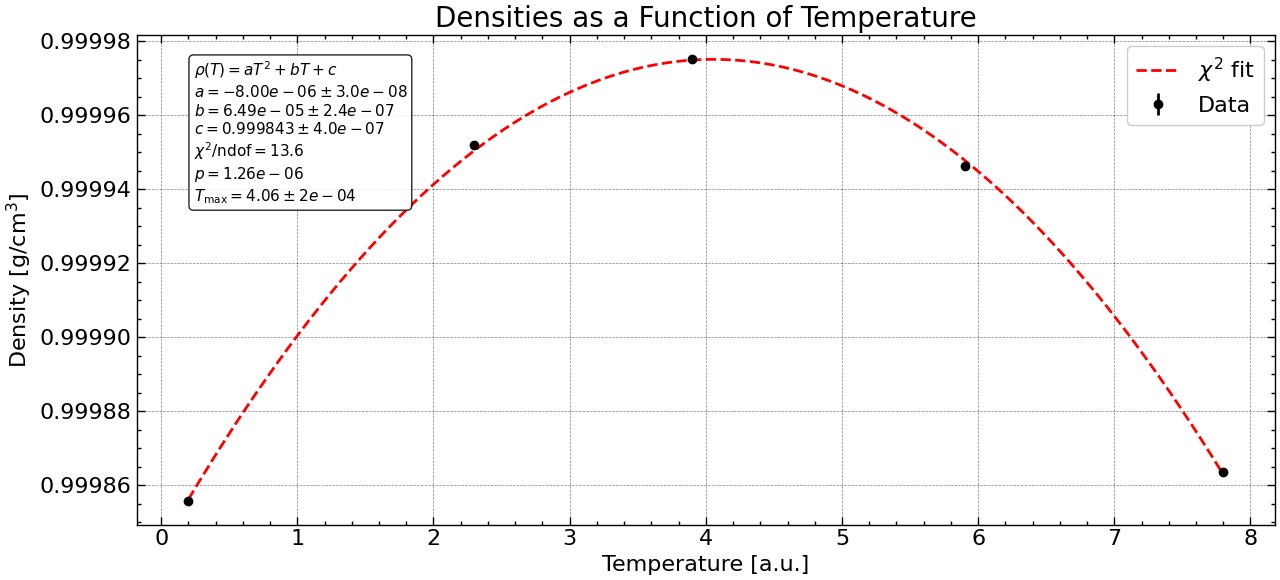

In [23]:
temperature_list = list(set(temp))

#defining the quadratic model
def quardratic(T, a, b, c):
    return a*T**2 + b*T + c

#doing iminuit chisquare fit 
cfit = cost.LeastSquares(temperature_list, means, sems, quardratic)
m = Minuit(cfit, a = -1e-6, b = 0, c = 1)
m.migrad()
m.hesse()

#extracting values from fit
a, b, c             = m.values["a"], m.values["b"], m.values["c"]
a_err, b_err, c_err = m.errors["a"], m.errors["b"], m.errors["c"]
chi2_value          = m.fval
ndof                = len(temperature_list) - m.nfit
p_value             = chi2.sf(chi2_value, ndof)
T_max               = -b / (2*a)
T_fit               = np.linspace(min(temperature_list), max(temperature_list), 500)
density_fit         = a*T_fit**2 + b*T_fit + c

#textstring for the plot
textstr = (
    r"$\rho(T)=aT^2+bT+c$" "\n"
    rf"$a = {a:.2e} \pm {a_err:.1e}$" "\n"
    rf"$b = {b:.2e} \pm {b_err:.1e}$" "\n"
    rf"$c = {c:.6f} \pm {c_err:.1e}$" "\n"
    rf"$\chi^2/\mathrm{{ndof}} = {chi2_value/ndof:.1f}$" "\n"
    rf"$p = {p_value:.2e}$" "\n"
    rf"$T_{{\max}} = {T_max:.2f} \pm {b_err**2/(4*a**2) + b**2 * a_err**2 / (4*a**2):.0e}$"
)

#plotting
plt.figure(figsize = (13,6))
plt.plot(T_fit, density_fit, '--', color = 'red', label = r'$\chi^2$ fit')
plt.errorbar(temperature_list, means, yerr = sems, fmt = 'o', color = 'black', label = 'Data')
plt.title('Densities as a Function of Temperature', fontsize = 20)
plt.xlabel('Temperature [a.u.]')
plt.ylabel(r'Density [g/cm$^3$]')
plt.legend()

plt.text(
    0.05, 0.95, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.85)
)
plt.tight_layout()
#plt.savefig('Problem 2.2.4.png', dpi = 300)

### Problem 2.3.1

In [24]:
#using sympy
mu_beta      = 0.5
sig_beta     = 0.02

gamma, beta = symbols("gamma, beta")
dgamma, dbeta = symbols("sigma_gamma, sigma_beta")

gamma = 1/(sqrt(1-beta**2))
lprint(latex(Eq(symbols('gamma'), gamma)))

dgamma = sqrt((gamma.diff(beta)*dbeta)**2)
lprint(latex(Eq(symbols('sigma_gamma'), dgamma)))

fgamma = lambdify((beta), gamma)
fdgamma = lambdify((beta, dbeta), dgamma)

vgamma = fgamma(mu_beta)
vdgamma = fdgamma(mu_beta, sig_beta)
lprint(fr'gamma = {vgamma:.6f} \pm {vdgamma:.6f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.3.2

In [25]:
#sympy again but this time using asymmetric uncertainties
mu_beta      = 0.95
sig_beta     = 0.02

gamma, beta = symbols("gamma, beta")
dgamma, dbeta = symbols("sigma_gamma, sigma_beta")

gamma = 1/(sqrt(1-beta**2))
lprint(latex(Eq(symbols('gamma'), gamma)))

dgamma = sqrt((gamma.diff(beta)*dbeta)**2)
lprint(latex(Eq(symbols('sigma_gamma'), dgamma)))

fgamma = lambdify((beta), gamma)
fdgamma = lambdify((beta, dbeta), dgamma)

vgamma = fgamma(mu_beta)
vdgamma = fdgamma(mu_beta, sig_beta)
lprint(fr'gamma = {vgamma:.6f} \pm {vdgamma:.6f}')

vgamma_low = fgamma(0.93)
vgamma_high = fgamma(0.97)
lprint(fr'gamma low = {vgamma:.6f} - {vgamma-vgamma_low:.6f}')
lprint(fr'gamma high = {vgamma:.6f} + {vgamma_high - vgamma:.6f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Problem 3

### Problem 3.1.1

In [26]:
#simulating the caes for plotting
x_list      = []
N_exp       = 10000
N           = 25

for experiment in range(N_exp):
    x = 0
    i = 1
    while i <= N:
        if random.random() >= 1/2:
            epsilon = -1
        else:
            epsilon = 1
        x += epsilon/i

        i+=1
    x_list.append(x)

x = np.array(x_list)

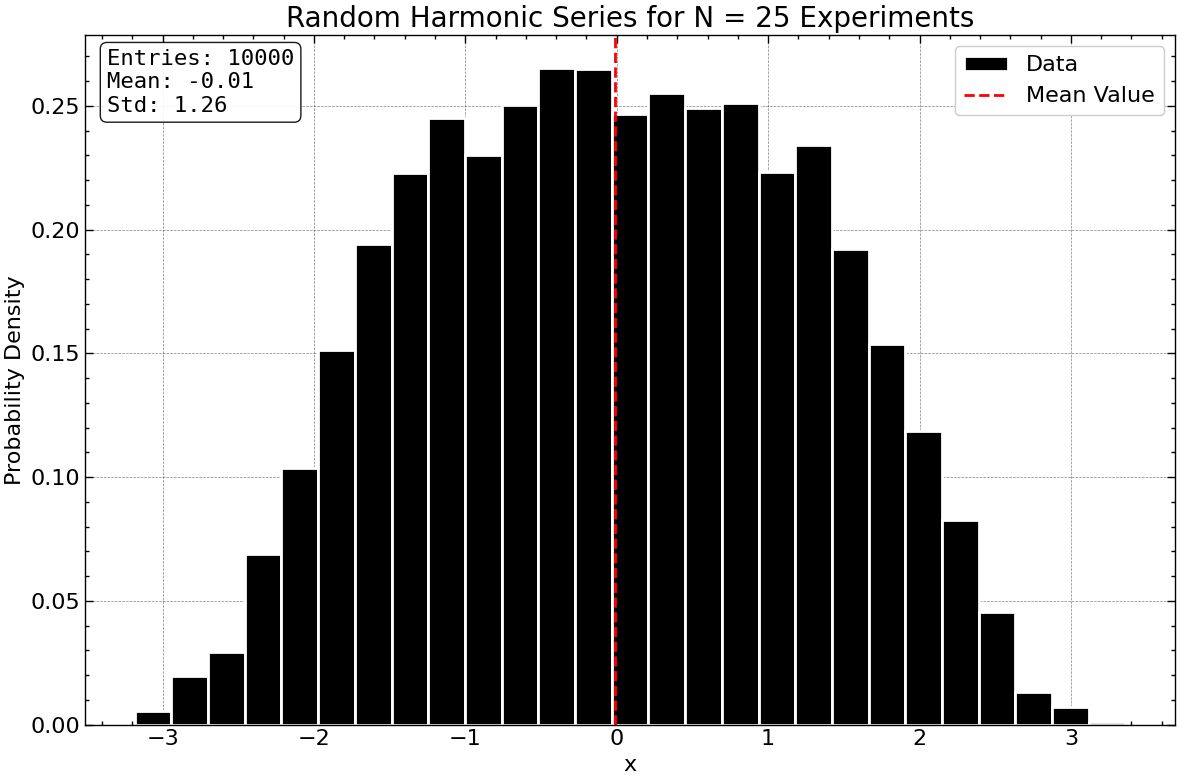

In [27]:
#(hopefully) correct binning
xmin, xmax = np.min(x), np.max(x)
mu_x = np.mean(x)
sigma_x = np.std(x)
entries = len(x)
Nbins = 27

#plotting
fig, ax = plt.subplots(figsize = (12,8))

ax.hist(x, bins = Nbins, range = (xmin, xmax), linewidth = 2, density = True, color = 'black', edgecolor = 'white', label = 'Data')

counts, bin_edges = np.histogram(x, bins = Nbins, range = (xmin, xmax), density = True)
x_centers         = (bin_edges[1:] + bin_edges[:-1]) / 2
y                 = counts
sy                = np.sqrt(counts)

ax.set(xlabel = 'x', ylabel = 'Probability Density')
ax.set_title('Random Harmonic Series for N = 25 Experiments', fontsize = 20)
ax.axvline(mu_x, color = 'red', linestyle = '--', linewidth = 2, label = 'Mean Value')
ax.legend(loc = 'best')

#plot info for the textbox (see below)
plot_info = [
    f"Entries: {entries}",
    f"Mean: {mu_x:.2f}",
    f"Std: {sigma_x:.2f}",
]

#text for plot
ax.text(
    0.02, 0.98,
    "\n".join(plot_info),
    transform=plt.gca().transAxes,
    fontsize=16,
    family='monospace',
    verticalalignment='top',
    bbox=dict(
        facecolor='white',      
        edgecolor='black',      
        boxstyle='round,pad=0.3', 
        alpha=0.9               
    )
)
plt.tight_layout()
#plt.savefig('Problem 3.1.1.png', dpi = 300)

### Problem 3.1.2

In [28]:
# doing a kolmogorov smirnov test on the distribution and the mirrored distribution
D, p_value = ks_2samp(x, -x)
print(D)
print(p_value)

0.0131
0.3574576387469889


### Problem 3.1.3

In [29]:
# again doing the simulatino for both N values
x25 = []

for experiment in range(N_exp):
    x_value = 0
    i = 1
    while i <= N:
        if random.random() >= 1/2:
            epsilon = -1
        else:
            epsilon = 1
        x_value += epsilon/i
        i += 1
    x25.append(x_value)

x25 = np.array(x25)

x250 = []
N_big = 250

for experiment in range(N_exp):
    x_value = 0
    i = 1
    while i <= N_big:
        if random.random() >= 1/2:
            epsilon = -1
        else:
            epsilon = 1
        x_value += epsilon/i
        i += 1
    x250.append(x_value)

x250 = np.array(x250)

#kolmogorov smirnov test on the two

d, p_value = ks_2samp(x25, x250)

print(d)
print(p_value)

0.0116
0.5116055794163079


### Problem 3.1.4

In [30]:
# shapiro wilk to test for normality 
x_center = x[np.abs(x250) <= 1*np.std(x250, ddof = 1)]
W_center, p_value_center = shapiro(x_center)
W, p_value = shapiro(x250)
print('Centered Shapiro-Wilk:', W_center, p_value_center)
print('Overall Shapiro-Wilk: ', W, p_value)

Centered Shapiro-Wilk: 0.9870319754194204 1.1545486444472496e-23
Overall Shapiro-Wilk:  0.9879802175590844 3.179106129268678e-28


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6330.
  res = hypotest_fun_out(*samples, **kwds)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


# Problem 4

### Problem 4.1.1

In [31]:
#loading data
df = pd.read_csv('data_BloodPressure.csv', header=0)
ptype, bloodp = df.values.T
df

,# Type,Blood Pressure
0,0,109.5
1,0,123.9
2,0,123.5
3,1,169.7
4,0,114.8
...,...,...
2493,0,125.2
2494,1,154.3
2495,0,119.9
2496,0,126.0


In [32]:
# calculating mean SBP and confidence intervals using the data 
healthy_sbp     = df[df['# Type'] == 0][' Blood Pressure']
healthy_mean    = healthy_sbp.mean()
healthy_std     = healthy_sbp.std(ddof = 1)
z = 1.96

print(f'Mean SBP: {healthy_mean:.1f} +- {healthy_std/np.sqrt(len(healthy_sbp)):.1f}')
print(f'Confidence Intervals:', f'\n Lower Bound = {healthy_mean - 1.96 * healthy_std/np.sqrt(len(healthy_sbp))}', 
      f'\n Upper Bound = {healthy_mean + 1.96 * healthy_std/np.sqrt(len(healthy_sbp))}')

Mean SBP: 120.7 +- 0.3
Confidence Intervals: 
 Lower Bound = 120.16081188566315 
 Upper Bound = 121.16652014303872


### Problem 4.1.2

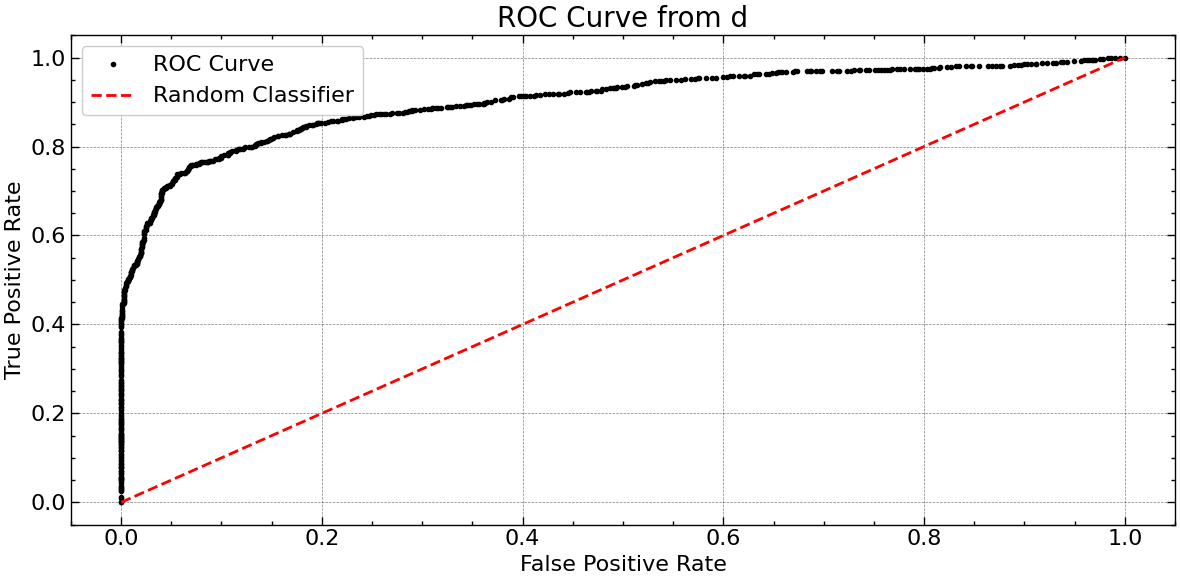

In [33]:
#doing ROC curve using sklearn functions
df['d']              = np.abs(df[' Blood Pressure'] - healthy_mean)
y_true               = (df['# Type'] != 0).astype(int)
scores               = df['d']
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc              = auc(fpr, tpr)

#plotting
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, '.', color = 'black', label = 'ROC Curve')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'red', label = 'Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve from d', fontsize = 20)
plt.legend()
plt.tight_layout()
#plt.savefig('Problem 4.1.2.png', dpi = 300)

### Problem 4.1.3

Nothing - see exam PDF

### Problem 4.1.4

In [34]:
# making window for the data to be in
sbp             = 98
window          = 1
low, high       = sbp - window/2, sbp + window/2

sbp_subset      = df[(df[' Blood Pressure'] >= low) & (df[' Blood Pressure'] < high)]
N_H2            = (sbp_subset['# Type'] == 2).sum()
N_total         = len(sbp_subset)

# calculating the probability
P_H2_given_98   = N_H2 / N_total

print(f'P(H_2 | SPS = 98) = {P_H2_given_98:.2f}')

P(H_2 | SPS = 98) = 0.63


### Problem 4.1.5

In [35]:
#defining once again just to make sure
healthy_sbp = df[df['# Type'] == 0][' Blood Pressure']
hyper_sbp   = df[df['# Type'] == 1][' Blood Pressure']
hypo_sbp    = df[df['# Type'] == 2][' Blood Pressure']

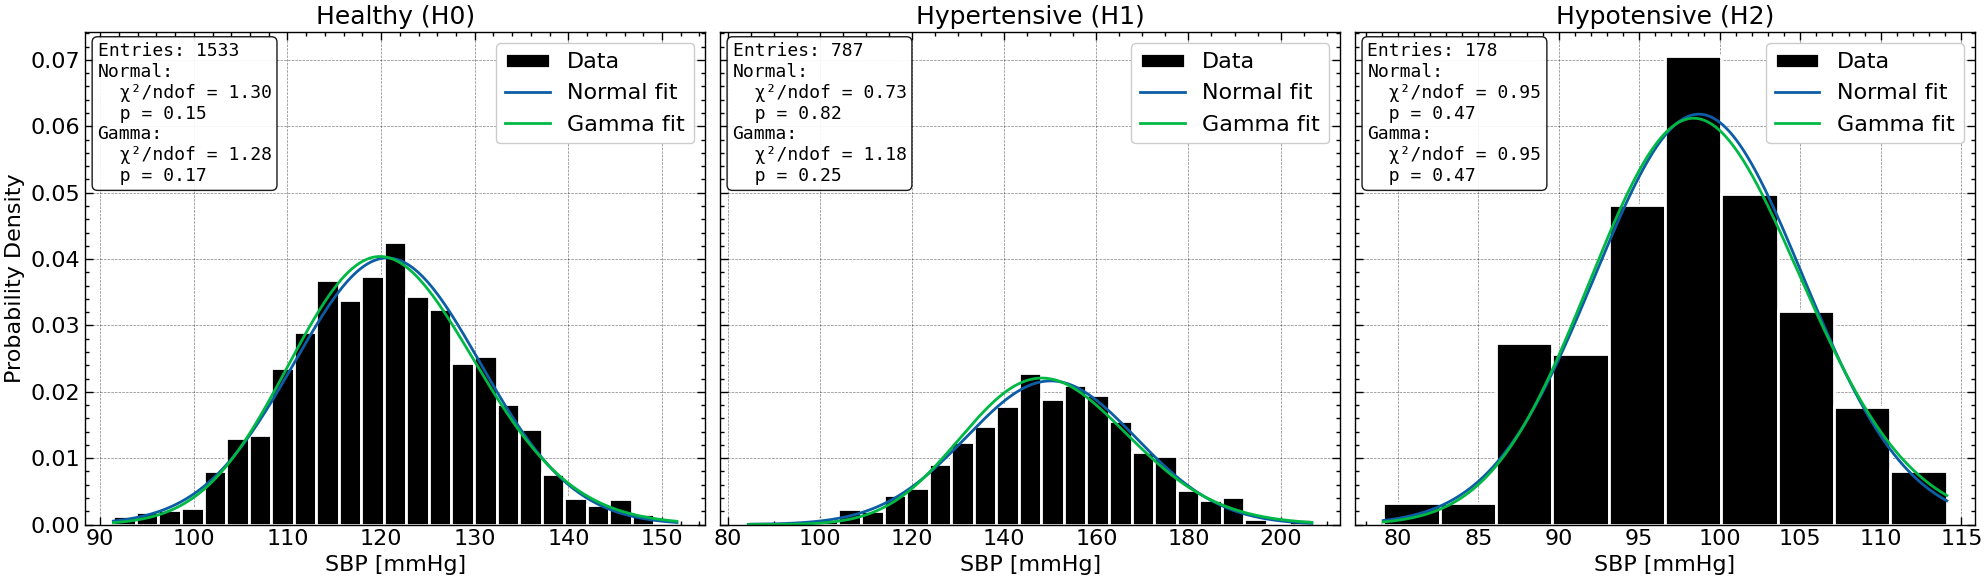

In [36]:
#import gamma since overwritten earlier
from scipy.stats import gamma
#binning
Nbins_healthy = 25
Nbins_hyper   = 25
Nbins_hypo    = 10

datasets = [("Healthy (H0)", healthy_sbp, Nbins_healthy), ("Hypertensive (H1)", hyper_sbp, Nbins_hyper), ("Hypotensive (H2)", hypo_sbp, Nbins_hypo)]

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

#for loop to go through all data, bins, fit functions etc.
for ax, (title, data, nbins) in zip(axes, datasets):

    data = np.asarray(data)
    data_min, data_max = data.min(), data.max()
    mu0 = data.mean()
    s0  = data.std(ddof=1)
    entries = len(data)

    #fitting histogram
    counts, edges = np.histogram(data, bins=nbins, range=(data_min, data_max))
    widths = edges[1:] - edges[:-1]
    Ntot = counts.sum()

    y  = counts / (Ntot * widths)
    sy = np.sqrt(np.maximum(counts, 1)) / (Ntot * widths)

    #doing chi2 for gauss
    def chi2_normal(mu, s):
        yexp = (norm.cdf(edges[1:], mu, s) - norm.cdf(edges[:-1], mu, s)) / widths
        return np.sum(((y - yexp) / sy) ** 2)

    mN = Minuit(chi2_normal, mu=mu0, s=s0)
    mN.migrad()
    mN.hesse()

    #doing start guesses
    var0 = np.var(data, ddof=1)
    k0 = (mu0**2 / var0)
    theta0 = (var0 / mu0)

    def chi2_gamma(k, theta):
        yexp = (gamma.cdf(edges[1:], a=k, scale=theta) - gamma.cdf(edges[:-1], a=k, scale=theta)) / widths
        return np.sum(((y - yexp) / sy) ** 2)

    mG = Minuit(chi2_gamma, k=k0, theta=theta0)
    mG.migrad()
    mG.hesse()

    ndof = nbins - 2

    #reduced chi2 and p-values for gauss and gamma
    chi2N_red = mN.fval / ndof
    chi2G_red = mG.fval / ndof

    pN = chi2.sf(mN.fval, ndof)
    pG = chi2.sf(mG.fval, ndof)

    #plotting
    ax.hist(data, bins=nbins, range=(data_min, data_max), density=True, linewidth=2, color='black', edgecolor='white', label='Data'
    )

    x_fit = np.linspace(data_min, data_max, 500)

    ax.plot(x_fit, norm.pdf(x_fit, mN.values["mu"], mN.values["s"]), label="Normal fit")
    ax.plot(x_fit, gamma.pdf(x_fit, a=mG.values["k"], scale=mG.values["theta"]), label="Gamma fit")

    ax.set_title(title, fontsize=18)
    ax.set_xlabel('SBP [mmHg]')
    ax.legend(loc="best")

#text box for plot info 
    ax.text(
        0.02, 0.98,
        (
            f"Entries: {entries}\n"
            f"Normal:\n"
            f"  χ²/ndof = {chi2N_red:.2f}\n"
            f"  p = {pN:.2f}\n"
            f"Gamma:\n"
            f"  χ²/ndof = {chi2G_red:.2f}\n"
            f"  p = {pG:.2f}"
        ),
        transform=ax.transAxes,
        fontsize=13,
        family='monospace',
        verticalalignment='top',
        bbox=dict(
            facecolor='white',
            edgecolor='black',
            boxstyle='round,pad=0.3',
            alpha=0.9
        )
    )

axes[0].set_ylabel('Probability Density')
plt.tight_layout()
#plt.savefig('Problem 4.1.5.png', dpi = 300)

# Problem 5.1

### Problem 5.1.1

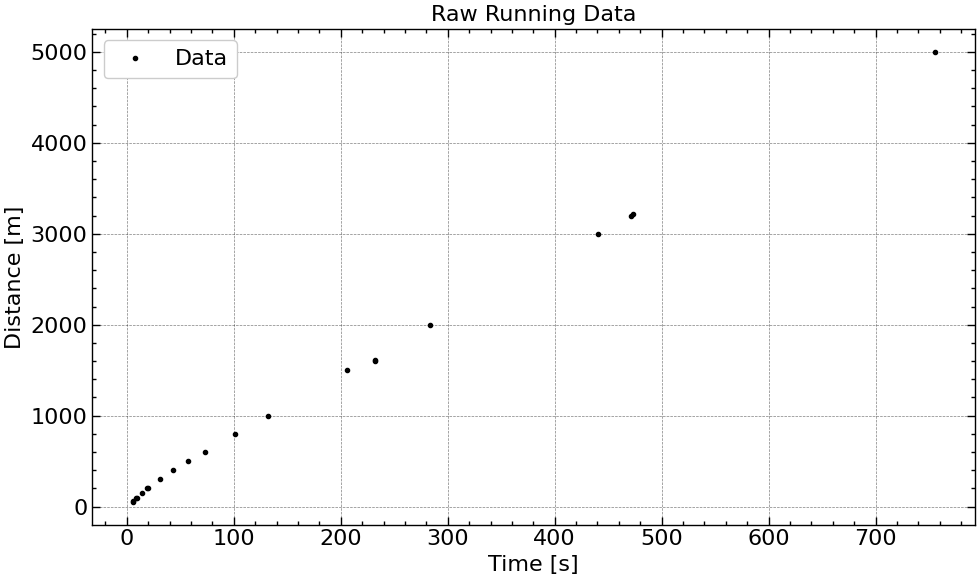

In [37]:
#importing data 
dataframe = pd.read_csv('data_RunningTimes.csv', header=0)
dist, t, sigma_t = dataframe.values.T

plt.figure(figsize = (10,6))
plt.plot(t, dist, '.', color = 'black', label = 'Data')
plt.xlabel('Time [s]')
plt.ylabel('Distance [m]')
plt.title('Raw Running Data')
plt.legend()
plt.tight_layout()
#plt.savefig('Problem 5.1.1 raw data.png', dpi = 300)

In [38]:
#definition of model 
def running_fit(t, v):
    return v*t

#just using curve fit to do the fit (quicker for me but perhaps I should've used iminuit to fit)
par, cov    = curve_fit(running_fit, t, dist)
v_init      = par[0]
sigma_d     = v_init * sigma_t

print(v_init)
print(sigma_d)

6.801298332580697
[  2.51648038   2.92455828   4.01276602   4.35283093   6.1211685
   7.88950607   9.31777872  11.4261812   14.96285633  18.43151848
  21.96819361  28.90551791  35.84284221  53.11813998  56.58680213
  55.83865931  70.39343774 104.80800731 111.67731862 125.96004512
 173.43310748]


In [39]:
#importing chi2 as it is overwrited somewhere in the code
from scipy.stats import chi2

#fitting
par, cov    = curve_fit(running_fit, t, dist, sigma = sigma_d, absolute_sigma=True)
v           = par[0]
sigma_v     = np.sqrt(cov[0, 0])

#chi2 etc.
residuals   = dist - running_fit(t, v)
chi2_val    = np.sum((residuals / sigma_d)**2)
ndof        = len(dist) - 1
chi2_ndof   = chi2_val / ndof
p_value     = chi2.sf(chi2_val, ndof)

print(f'Fit velocity (with uncertainties) = {v:.2f} +- {sigma_v:.2f} m/s')

Fit velocity (with uncertainties) = 7.79 +- 0.07 m/s


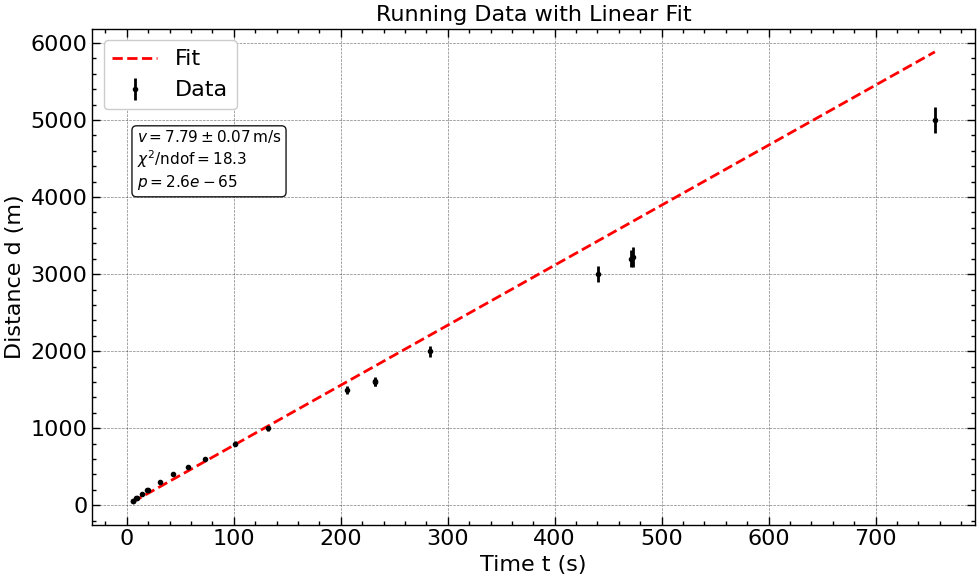

In [40]:
t_fit = np.linspace(min(t), max(t), 500)

#plotting
plt.figure(figsize = (10,6))
plt.errorbar(t, dist, yerr=sigma_d, fmt='.', color = 'black', label='Data')
plt.plot(t_fit, running_fit(t_fit, v), '--', color = 'red', label=fr'Fit')
plt.xlabel('Time t (s)')
plt.ylabel('Distance d (m)')
plt.title('Running Data with Linear Fit')
plt.legend()

textstr = (
    rf"$v = {v:.2f} \pm {sigma_v:.2f}\,\mathrm{{m/s}}$" "\n"
    rf"$\chi^2/\mathrm{{ndof}} = {chi2_ndof:.1f}$" "\n"
    rf"$p = {p_value:.1e}$")

plt.text(
    0.05, 0.8, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.9)
)


plt.tight_layout()
#plt.savefig('Problem 5.1.1 running data with fit.png', dpi = 300)

### Problem 5.1.2

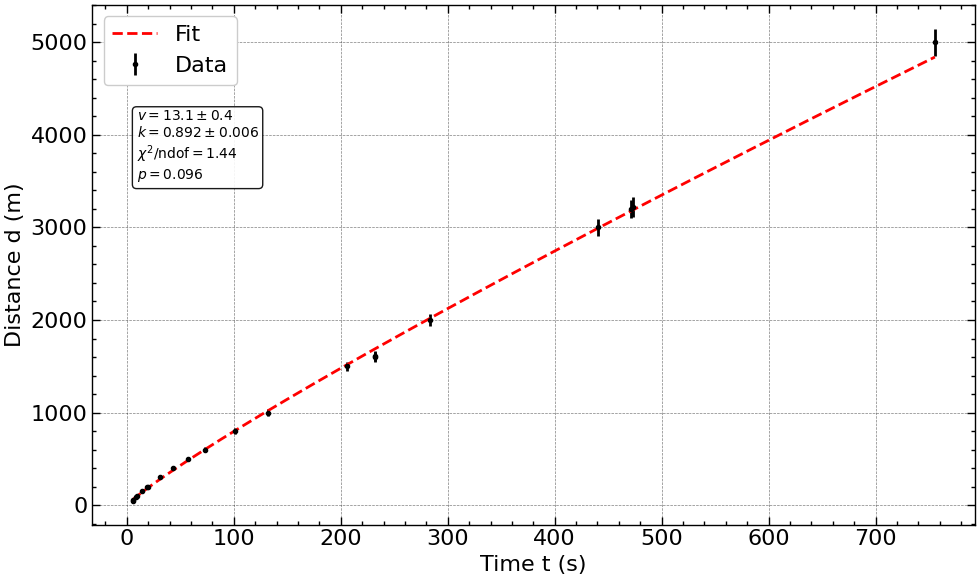

In [41]:
#defining power law for the fit
def power_law(t, v, k):
    return v * t**k

par, cov = curve_fit(power_law, t, dist)
v, k = par

#doing the error propagation
for i in range(6):
    sigma_d = np.abs(v * k * t**(k - 1)) * sigma_t

    par_new, cov_new = curve_fit(power_law, t, dist, sigma=sigma_d, absolute_sigma=True, p0=(v, k))
    v, k = par_new
    cov = cov_new

# errors
sigma_v, sigma_k = np.sqrt(np.diag(cov))

sigma_d = np.abs(v * k * t**(k - 1)) * sigma_t
residuals = dist - power_law(t, v, k)
chi2_val = np.sum((residuals / sigma_d)**2)
ndof = len(dist) - 2
chi2_ndof = chi2_val / ndof
p_value = chi2.sf(chi2_val, ndof)

t_fit = np.linspace(t.min(), t.max(), 500)


#plotting with errors
plt.figure(figsize=(10, 6))
plt.errorbar(t, dist, yerr=sigma_d, fmt='.', color = 'black', label='Data')
plt.plot(t_fit, power_law(t_fit, v, k), '--', color = 'red', label=f'Fit')

plt.xlabel("Time t (s)")
plt.ylabel("Distance d (m)")
plt.legend()

txt = (
    rf"$v={v:.3g}\pm{sigma_v:.1g}$" "\n"
    rf"$k={k:.3f}\pm{sigma_k:.3f}$" "\n"
    rf"$\chi^2/\mathrm{{ndof}}={chi2_ndof:.2f}$" "\n"
    rf"$p={p_value:.3f}$"
)
plt.text(
    0.05, 0.8, txt,
    transform=plt.gca().transAxes,
    va="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)
plt.tight_layout()
#plt.savefig('Problem 5.1.2.png', dpi = 300)

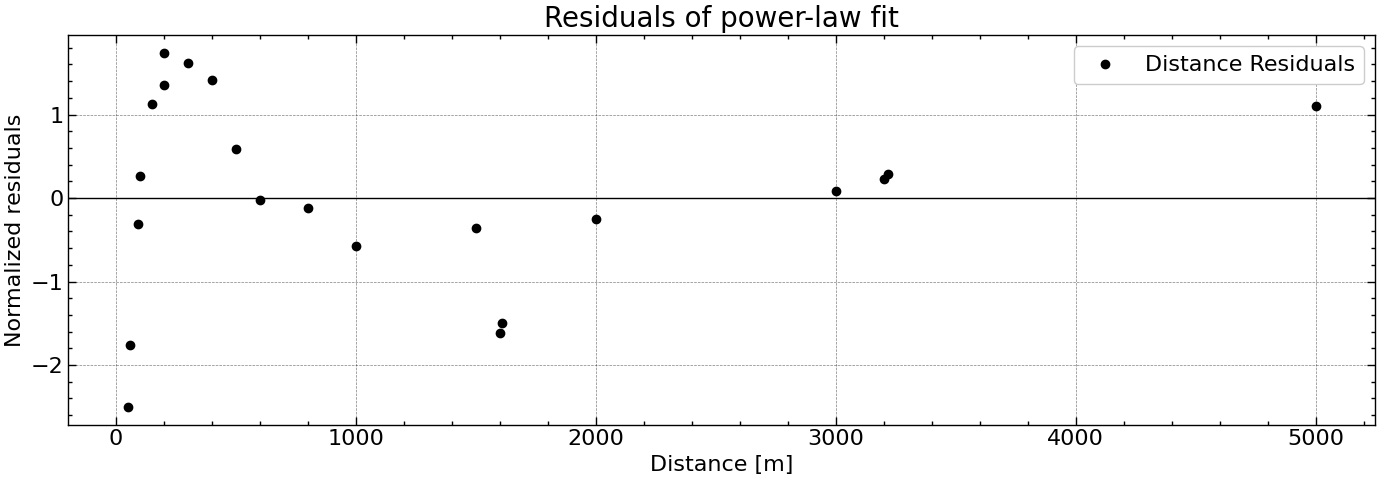

In [42]:
#calculating residuals and plotting afterwards
residuals = dist - power_law(t, v, k)
norm_residuals = residuals / sigma_d

plt.figure(figsize=(14, 5))

plt.axhline(0, color='k', lw=1)
plt.plot(dist, norm_residuals, 'o', color = 'black', label = 'Distance Residuals')
plt.xlabel("Distance [m]")
plt.ylabel("Normalized residuals")
plt.title("Residuals of power-law fit", fontsize = 20)
plt.legend()

plt.tight_layout()
#plt.savefig('Problem 5.1.2 residuals.png', dpi = 300)

### Problem 5.2.1

In [43]:
#again chi2 is overwrited somewhere so I have to import it again
from scipy.stats import chi2

df = pd.read_csv('data_RadioSignals.csv', header=0)
freq, a, b = df.values.T

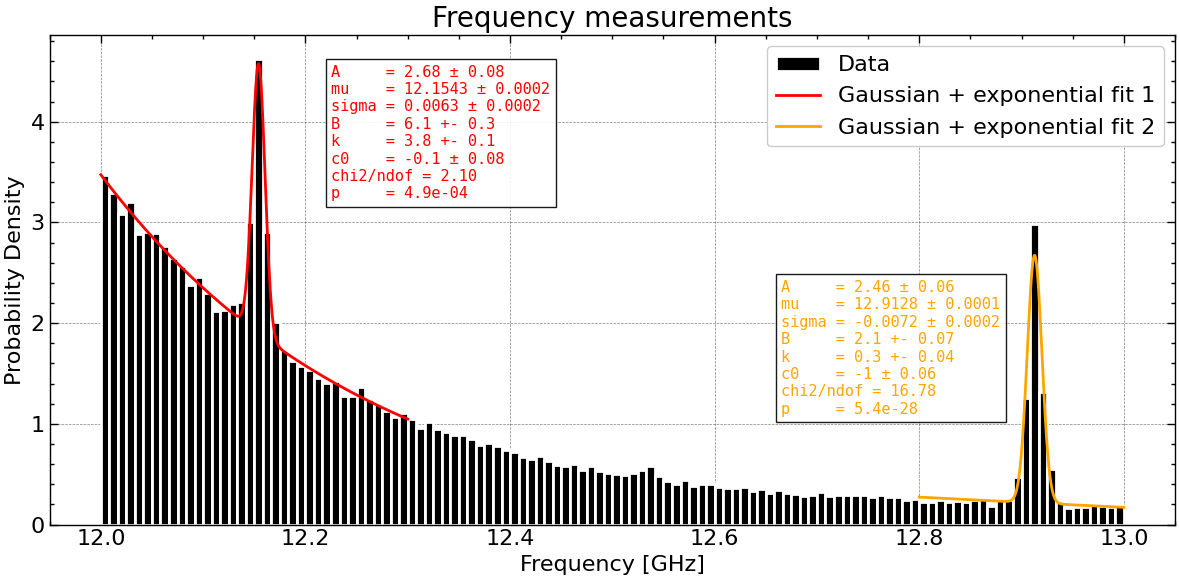

In [44]:
#binning and fit mask etc.
Nbins = 120
data_min, data_max = freq.min(), freq.max()

counts, edges = np.histogram(freq, bins=Nbins, range=(data_min, data_max))
widths  = edges[1:] - edges[:-1]
centers = 1/2 * (edges[1:] + edges[:-1])
Ntot = counts.sum()

x_low1, x_high1 = 12.0, 12.3
x_low2, x_high2 = 12.87, 13
x0_1            = x_low1
x0_2            = x_low2
fit_mask1       = (centers >= x_low1) & (centers <= x_high1) & (counts > 0)
fit_mask2       = (centers >= x_low2) & (centers <= x_high2) & (counts > 0)

y  = counts / (Ntot * widths)
sy = np.sqrt(np.maximum(counts, 1)) / (Ntot * widths)

#defining models and chi2
def gaussian_exponential(x, A, mu, sigma, B, k, c0, x0):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + (B * np.exp(-k * (x-x0)) + c0)

def gaussian(x, A, mu, sigma, c0):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2) + c0

def chi2_1(A, mu, sigma, B, k, c0, x0):
    x = centers[fit_mask1]
    yexp = gaussian_exponential(x, A, mu, sigma, B, k, c0, x0)
    return np.sum(((y[fit_mask1] - yexp) / sy[fit_mask1])**2)

def chi2_2(A, mu, sigma, B, k, c0, x0):
    x = centers[fit_mask2]
    yexp = gaussian_exponential(x, A, mu, sigma, B, k, c0, x0)
    return np.sum(((y[fit_mask2] - yexp) / sy[fit_mask2])**2)

#first Gauss parameter guesses
A0_1              = 0.5
mu0_1             = 12.14
sigma0_1          = 0.01
B0_1              = 5
k0_1              = 0.1
c00_1             = 0
x0_11             = x_low1

#second Gauss parameter guesses
A0_2              = 3
mu0_2             = 12.6
sigma0_2          = 0.006
c00_2             = 0.3


#first fit
m1          = Minuit(chi2_1, A = A0_1, mu = mu0_1, sigma = sigma0_1, B = B0_1, k = k0_1, c0 = c00_1, x0 = x0_1)
m1.migrad()
m1.hesse()
ndof1       = np.sum(fit_mask1) - len(m1.values)
p1          = chi2.sf(m1.fval, ndof1)

#second fit
m2 = Minuit(chi2_2, A = A0_2, mu = mu0_2, sigma = sigma0_2, B = 5, k = 0, c0 = c00_2, x0 = x_low2)
m2.migrad()
m2.hesse()
ndof2 = np.sum(fit_mask2) - len(m2.values)
p2          = chi2.sf(m2.fval, ndof2)

#plotting of fits etc.
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(freq, bins=Nbins, range=(data_min, data_max), density=True, linewidth=2, color='black', edgecolor='white', label='Data')

x_fit1 = np.linspace(12, 12.3, 2000)
x_fit2 = np.linspace(12.8, 13, 2000)

ax.plot(x_fit1, gaussian_exponential(x_fit1, *m1.values), color = 'red', label = 'Gaussian + exponential fit 1')
ax.plot(x_fit2, gaussian_exponential(x_fit2, *m2.values), color = 'orange', label = 'Gaussian + exponential fit 2')

ax.set_title("Frequency measurements", fontsize=20)
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Probability Density")
ax.legend(loc="best")

#text boxes with plot info
ax.text(
    0.25, 0.94,
    (
        f"A     = {m1.values['A']:.3g} ± {m1.errors['A']:.1g}\n"
        f"mu    = {m1.values['mu']:.6g} ± {m1.errors['mu']:.1g}\n"
        f"sigma = {m1.values['sigma']:.2g} ± {m1.errors['sigma']:.1g}\n"
        f"B     = {m1.values['B']:.2g} +- {m1.errors['B']:.1g}\n"
        f"k     = {m1.values['k']:.2g} +- {m1.errors['k']:.1g}\n"
        f"c0    = {m1.values['c0']:.1g} ± {m1.errors['c0']:.1g}\n"
        f"chi2/ndof = {m1.fval/ndof1:.2f}\n"
        f"p     = {p1:.1e}"
    ),
    transform=ax.transAxes,
    fontsize=11,
    family="monospace",
    va="top",
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.9),
    color = 'red'
)

ax.text(
    0.65, 0.5,
    (
        f"A     = {m2.values['A']:.3g} ± {m2.errors['A']:.1g}\n"
        f"mu    = {m2.values['mu']:.6g} ± {m2.errors['mu']:.1g}\n"
        f"sigma = {m2.values['sigma']:.2g} ± {m2.errors['sigma']:.1g}\n"
        f"B     = {m2.values['B']:.2g} +- {m2.errors['B']:.1g}\n"
        f"k     = {m2.values['k']:.2g} +- {m2.errors['k']:.1g}\n"
        f"c0    = {m2.values['c0']:.1g} ± {m2.errors['c0']:.1g}\n"
        f"chi2/ndof = {m2.fval/ndof2:.2f}\n"
        f"p     = {p2:.1e}"
    ),
    transform=ax.transAxes,
    fontsize=11,
    family="monospace",
    va="top",
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.9),
    color = 'orange'
)
plt.tight_layout()
#plt.savefig('Problem 5.2.1.png', dpi = 300)

### Problem 5.2.2

In [45]:
# doing the two sample test on both A and sigma using the estimated parameters
print(f'z_A = {(m1.values['A'] - m2.values['A'])/np.sqrt(m1.values['A']**2 + m2.values['A']**2)}')
print(f'z_spread = {(m1.values['sigma'] - m2.values['sigma'])/np.sqrt(m1.values['sigma']**2 + m2.values['sigma']**2)}')

z_A = 0.06072918147723001
z_spread = 1.4110956736395053


### Problem 5.2.3

Nothing - see PDF

### Problem 5.2.4

Nothing - see PDF